# Casos COVID-19 confirmados en Mexico 

## Objetivo

Analizar los casos confirmados de Covid19 por estados de la Republica Mexicana para conocer el efecto que tuvo el confinamiento y, actualmente, la reapertura escalonada en algunos estados. 

## Información y base de datos

La base de datos utilizada proviene del portal del Gobierno de Mexico [Liga](https://coronavirus.gob.mx/datos/).

**Carga de paquetería que se usará para el análisis de datos**

In [1]:
library(tidyverse)
library(lubridate)



Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.1     v dplyr   1.0.0
v tidyr   1.1.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



**Carga de base de datos**

In [217]:
df<-read.csv("Casos_Diarios_Estado_Nacional_Confirmados_20200716.csv")

***Estructura de la informacion***

In [218]:
str(df)

'data.frame':	33 obs. of  190 variables:
 $ cve_ent    : int  1 2 3 4 7 8 9 5 6 10 ...
 $ poblacion  : int  1434635 3634868 804708 1000617 5730367 3801487 9018645 3218720 785153 1868996 ...
 $ nombre     : Factor w/ 33 levels "AGUASCALIENTES",..: 1 2 3 4 5 6 9 7 8 10 ...
 $ X12.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X13.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X14.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X15.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X16.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X17.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X18.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X19.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X20.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X21.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X22.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X23.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X24.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X25.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X26.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X27.01.2020: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X28.0

In [13]:
str(covid_mex)

tibble [33 × 189] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ cve_ent   : chr [1:33] "01" "02" "03" "04" ...
 $ poblacion : num [1:33] 1434635 3634868 804708 1000617 5730367 ...
 $ nombre    : chr [1:33] "AGUASCALIENTES" "BAJA CALIFORNIA" "BAJA CALIFORNIA SUR" "CAMPECHE" ...
 $ 12-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 13-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 14-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 15-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 16-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 17-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 18-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 19-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 20-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 21-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 22-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 23-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 24-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 25-01-2020: num [1:33] 0 0 0 0 0 0 0 0 0 0 ...
 $ 26-01-2020: num [1:33]

Pasamos la base a _long format_

In [219]:
df_long<-df %>%
    pivot_longer(cols=starts_with("X"),
                 names_to="fecha",
                 values_to="casos")

In [220]:
head(df_long)

cve_ent,poblacion,nombre,fecha,casos
1,1434635,AGUASCALIENTES,X12.01.2020,0
1,1434635,AGUASCALIENTES,X13.01.2020,0
1,1434635,AGUASCALIENTES,X14.01.2020,0
1,1434635,AGUASCALIENTES,X15.01.2020,0
1,1434635,AGUASCALIENTES,X16.01.2020,0
1,1434635,AGUASCALIENTES,X17.01.2020,0


Pasamos la columna de fecha a formato de fecha en R

In [221]:
df_long$fecha<- df_long$fecha %>%
                    str_remove("X") %>%
                    dmy()

In [222]:
df_long<-rename(df_long, estado=nombre)

In [223]:
str(df_long)

tibble [6,171 x 5] (S3: tbl_df/tbl/data.frame)
 $ cve_ent  : int [1:6171] 1 1 1 1 1 1 1 1 1 1 ...
 $ poblacion: int [1:6171] 1434635 1434635 1434635 1434635 1434635 1434635 1434635 1434635 1434635 1434635 ...
 $ estado   : Factor w/ 33 levels "AGUASCALIENTES",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ fecha    : Date[1:6171], format: "2020-01-12" "2020-01-13" ...
 $ casos    : int [1:6171] 0 0 0 0 0 0 0 0 0 0 ...


## Análisis exploratorio

### Casos confirmados a nivel nacional

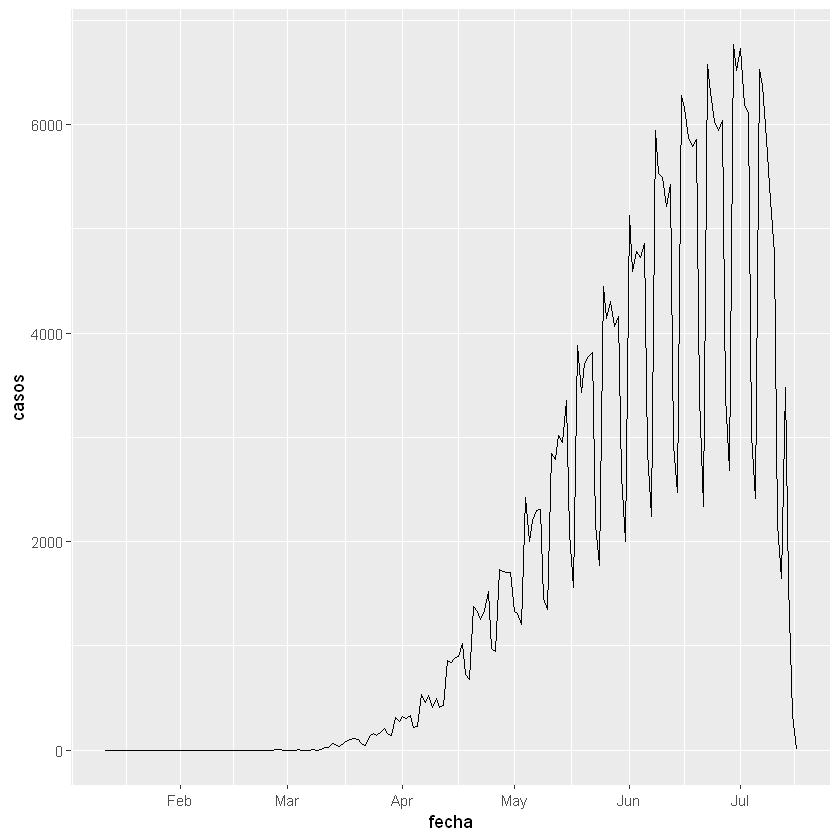

In [224]:
ggplot(subset(df_long,estado=='Nacional'), aes(x= fecha, y=casos)) +
    geom_line()     

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 46 rows containing non-finite values (stat_smooth)."

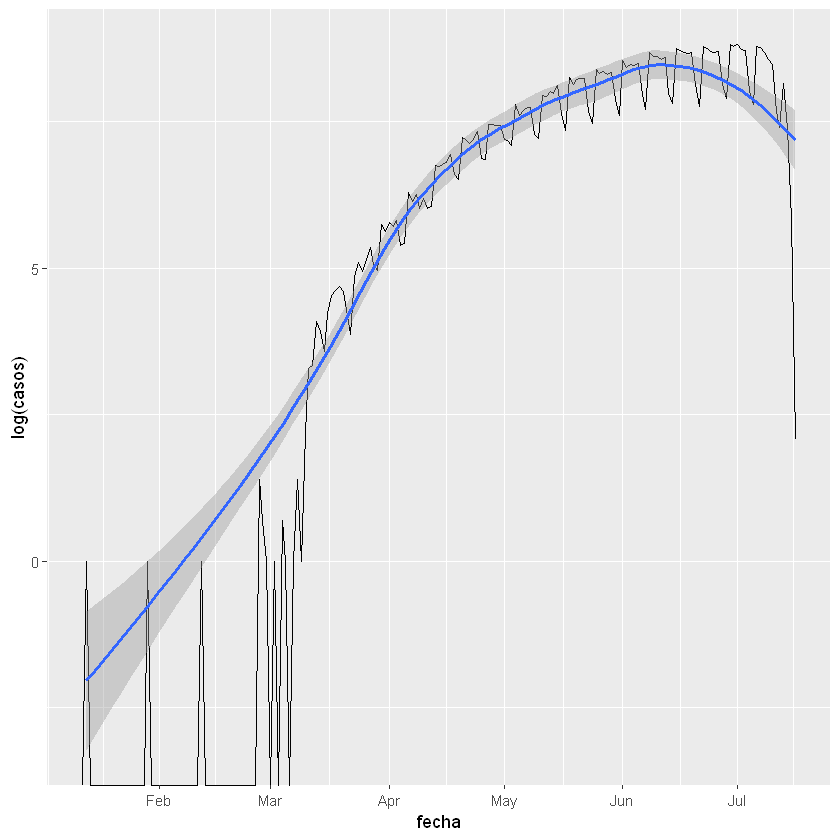

In [225]:
ggplot(subset(df_long,estado=='Nacional'), aes(x= fecha, y=log(casos))) +
    geom_line() + 
    geom_smooth()

Podemos observar que parece haber una gran disminución de casos durante el mes de julio, pero esto se debe a un retraso administrativo en el reporte de casos confirmados. Por lo tanto, usaremos los datos disponibles hasta el 10 de julio. Esta fecha la decidimos porque es la última fecha para la cual la cantidad de casos confirmados es más cercana a la cantidad reportada en la conferencia que realiza el gobierno de México.

**Volvemos a realizar las gráficas a nivel nacional pero sin las últimas fechas reportadas**

In [230]:
df_long<-df_long %>%
            filter(fecha<=ymd(20200710))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


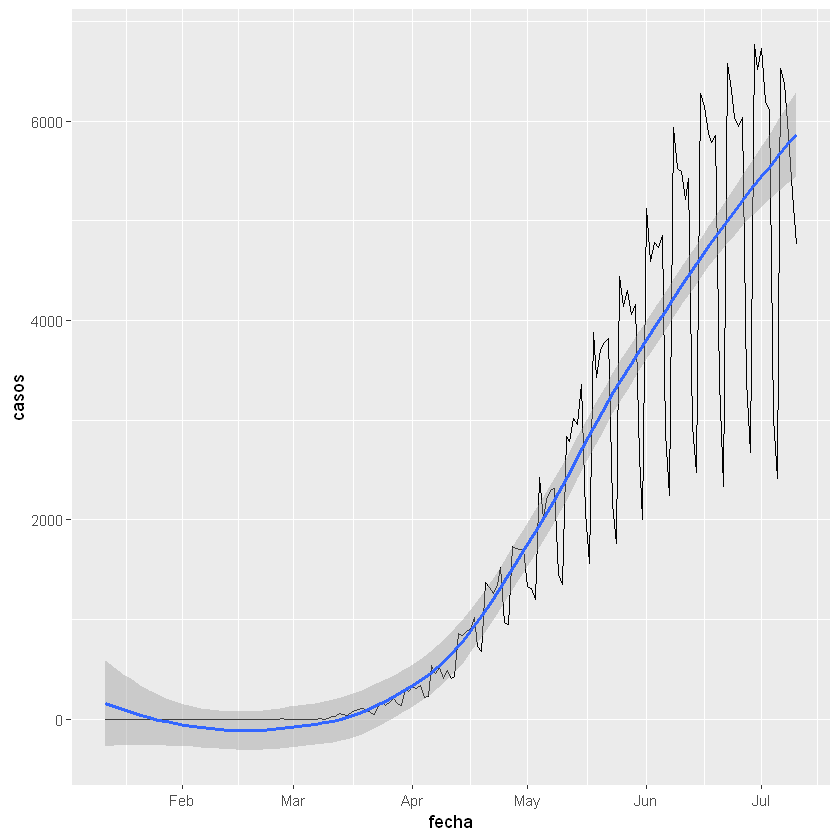

In [264]:
ggplot(subset(df_long,estado=='Nacional'), aes(x= fecha, y=casos)) +
    geom_line() +
    geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 46 rows containing non-finite values (stat_smooth)."

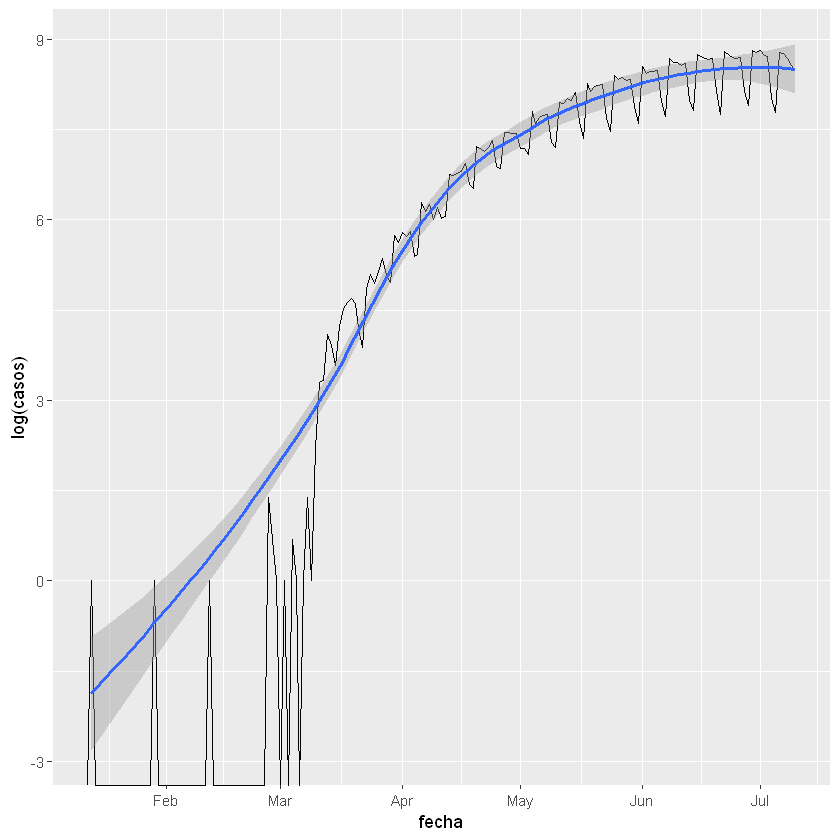

In [232]:
ggplot(subset(df_long,estado=='Nacional'), aes(x= fecha, y=log(casos))) +
    geom_line() + 
    geom_smooth()

### Casos reportados

Podemos observar que hay picos en la cantidad de casos, hay más casos entre semana y los fines de semana disminuyen. Esto puede deberse a un retraso administrativo en el reporte de casos durante el fin de semana por parte de la Secretaría de Salud. La otra razón podría ser social y que la gente decide salir los fines de semana, por lo que durante la semana reportan síntomas y asisten al hospital.
De las gráficas podemos observar el crecimiento de casos confirmados que hubo en México. En la primer gráfica se utlizaron los datos reportados. En la segunda, se reporta el logaritmo de los casos a nivel nacional. Se usó el logaritmo para que fuera más fácil ver cuando se estabiliza el crecimiento de los casos confirmados (la meseta de la gráfica). Otra ventaga de usar el logaritmo es que disminuye las fluctuaciones que se veían en los fines de semana. Como el logaritmo de cero no está definido, R automáticamente elimna estos casos, los cuales a nivel nacional fueron 46, los cuales se ubican al principio de la pandemia. 

### Comportamiento de casos reportados

En el ambos gráficos además de observar los casos reportados por día, se puede observar una función que aproxima el comportamiento de los datos. Esta función fue calculada por el paquete ggplot2 y utiliza una regresión local, conocida también como LOESS (local regression). Para más información sobre esta regresión puedes revisar la siguiente [liga](http://www.math.wpi.edu/saspdf/stat/chap38.pdf). 

Se puede observar en la primer gráfica, en la que se usan el número de casos diarios, que esta regresión estima una función que no es adecuada a los datos al principio de la pandemia. Pareciera indicar que había más casos antes de la pandemia (extrapolación) y luego toma valores negativos, lo cual es incorrecto. 
En ambas estimaciones, con casos y logaritmo de casos, se puede observar que aún estamos en una fase de crecimiento de la pandemia. Pero de la segunda gráfica podríamos decir que se está estabilizando y que tal vez pronto podríamos empezar una fase de decrecimiento. 

### Confirmados a nivel estatal

A continuación graficaremos el número de casos y el logaritmo del número de casos a nivel estatal.

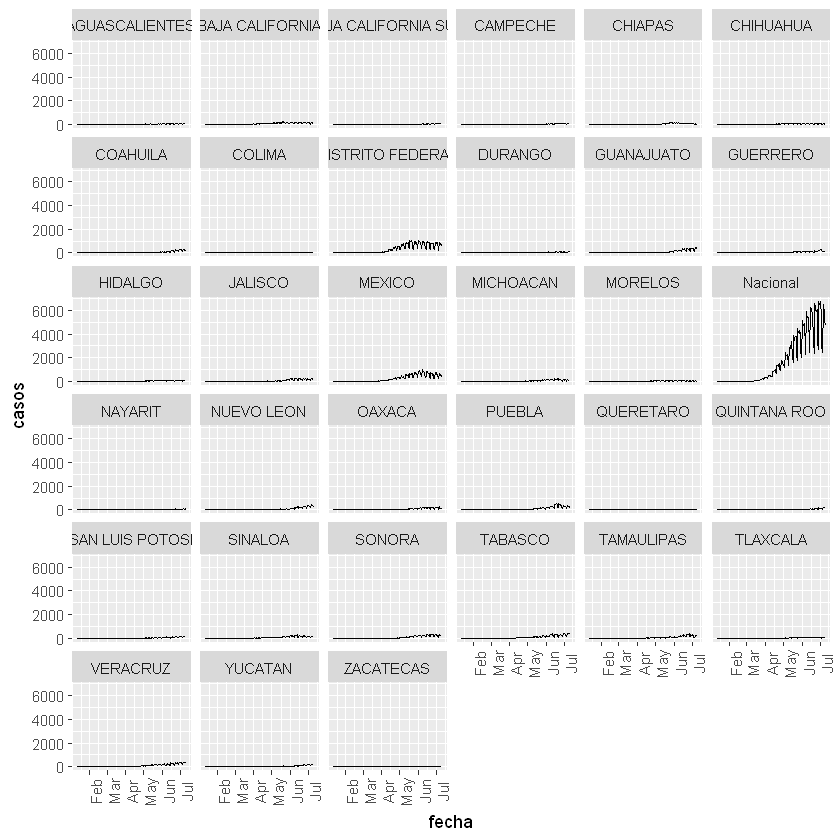

In [290]:
ggplot(data=df_long, aes(x= fecha, y=casos)) +
    geom_line() +
    theme(axis.text.x = element_text(angle = 90))+
    facet_wrap(~estado)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


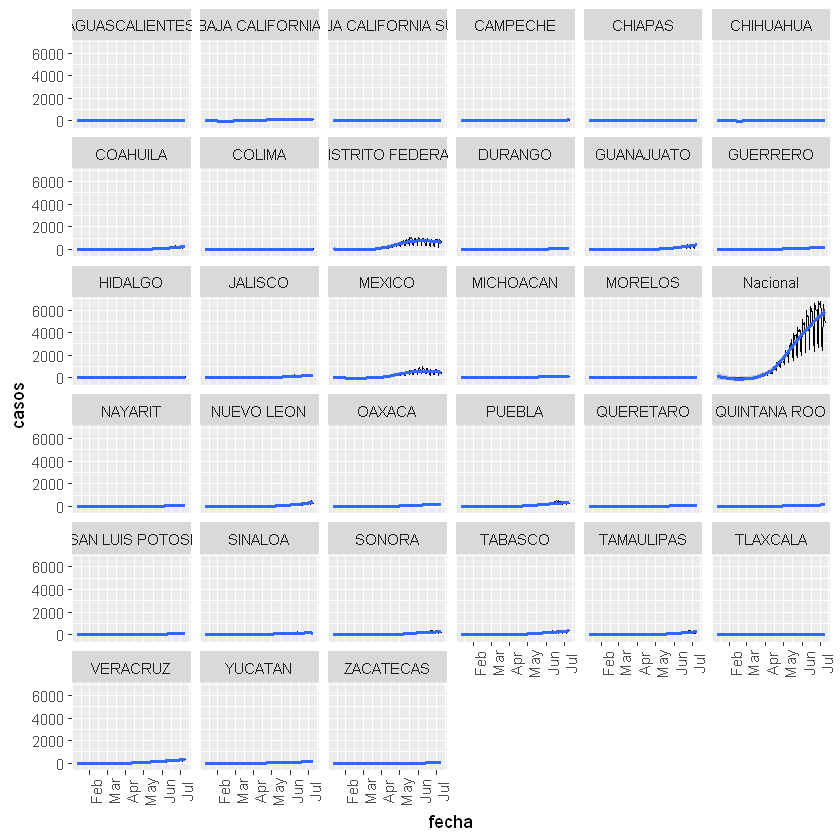

In [292]:
ggplot(data=df_long, aes(x= fecha, y=casos)) +
    geom_line() +
    geom_smooth()+
    theme(axis.text.x = element_text(angle = 90))+
    facet_wrap(~estado)

Debido a las diferentes escalas no se puede apreciar adecuadamente el reporte de casos confirmados en algunos estados, por lo que usaremos el logaritmo de los casos reportados.

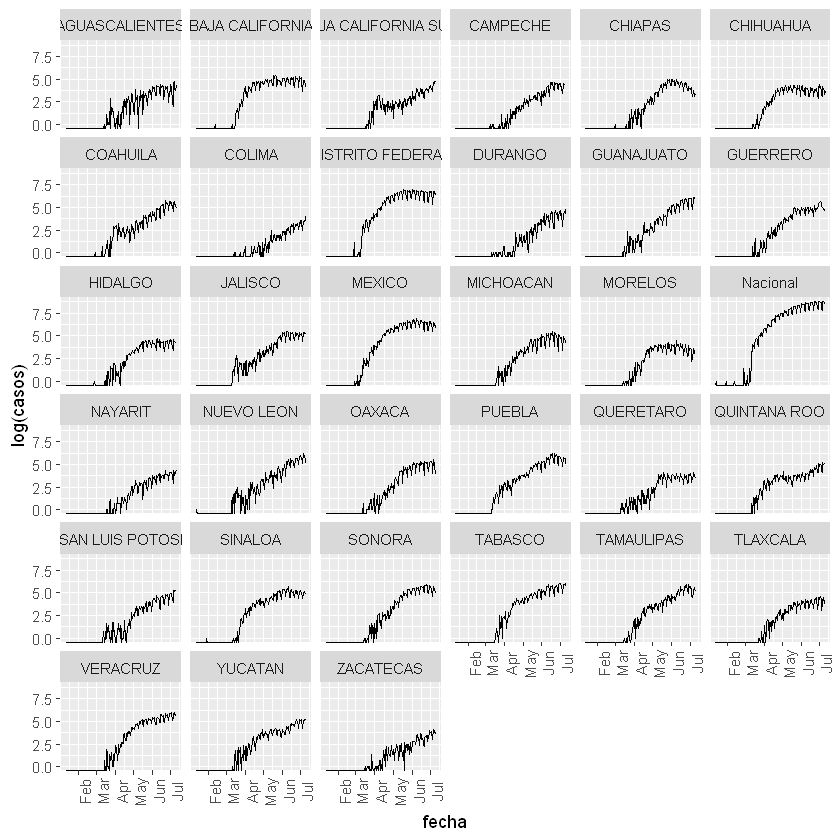

In [271]:
ggplot(data=df_long, aes(x= fecha, y=log(casos))) +
    geom_line() +
    theme(axis.text.x = element_text(angle = 90))+
    facet_wrap(~estado)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 2211 rows containing non-finite values (stat_smooth)."

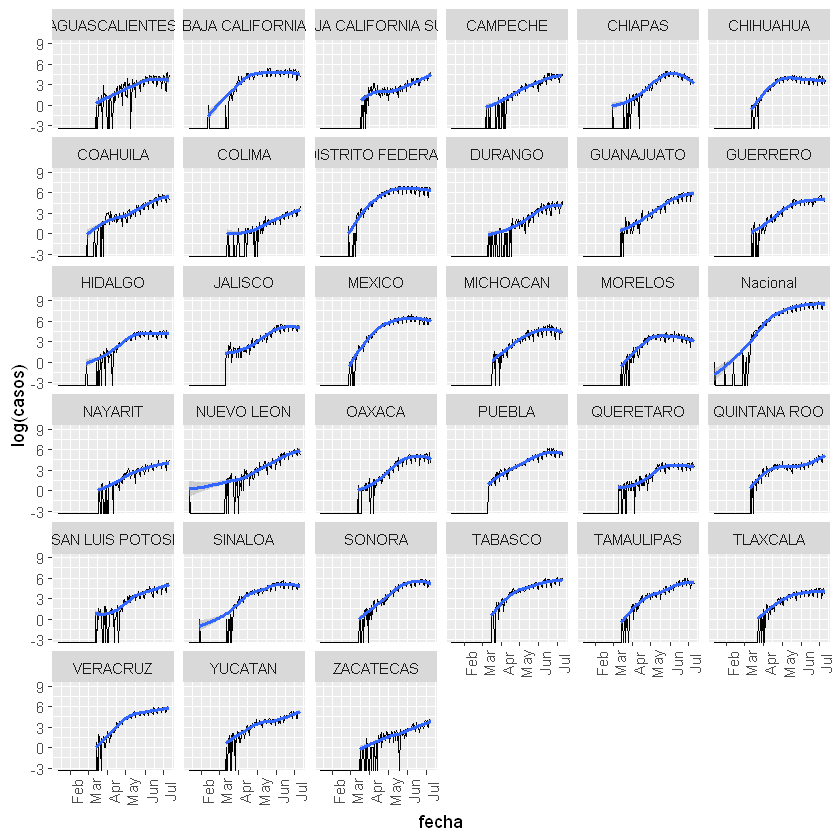

In [272]:
ggplot(data=df_long, aes(x= fecha, y=log(casos))) +
    geom_line() +
    geom_smooth() +
    theme(axis.text.x = element_text(angle = 90))+
    facet_wrap(~estado)

Al igual que en el análisis de casos confirmados a nivel nacional, realizamos una regresión local (loess) con el logaritmo de los casos confirmados para conocer el comportamiento del crecimiento de contagios Covid-19. Con estas aproximaciones podemos ver que algunos estados parecen estar llegando al máximo de contagios o donde la derivada de la función es cero. Solo un estado parece estar con pendiente negativa en cuanto al crecimiento de contagios: Chiapas.

## Efectividad del confinamiento

Se considera como fecha de inicio del confinamiento nacional el 23 de marzo de 2020.

In [8]:
confinamiento<-"2020-03-23"

In [9]:
df_long$conf<-df_long$fecha<confinamiento
df_long$conf[df_long$conf==TRUE]<-'InicioPandemia'
df_long$conf[df_long$conf==FALSE]<-'Confinamiento'

Se separan las cifras totales para el analisis por estado

In [10]:
df_long_estados<-subset(df_long,estado!='Nacional')

Resultados de confirmados por etapa de confinamiento

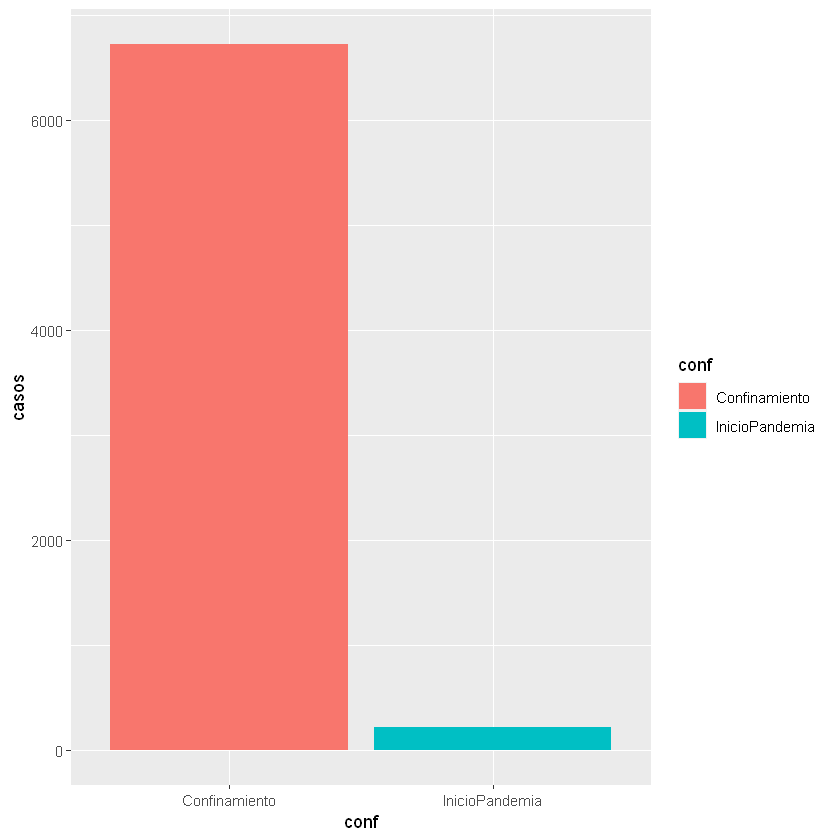

In [11]:
ggplot(subset(df_long,estado=='Nacional'),aes(fill=conf,y=casos,x=conf)) +
  geom_bar(position="dodge",stat="identity")

Se puede observar que existe un numero mayor de confirmados por covid-19 durante la etapa de confinamiento que durante el inicio de la pandemia.

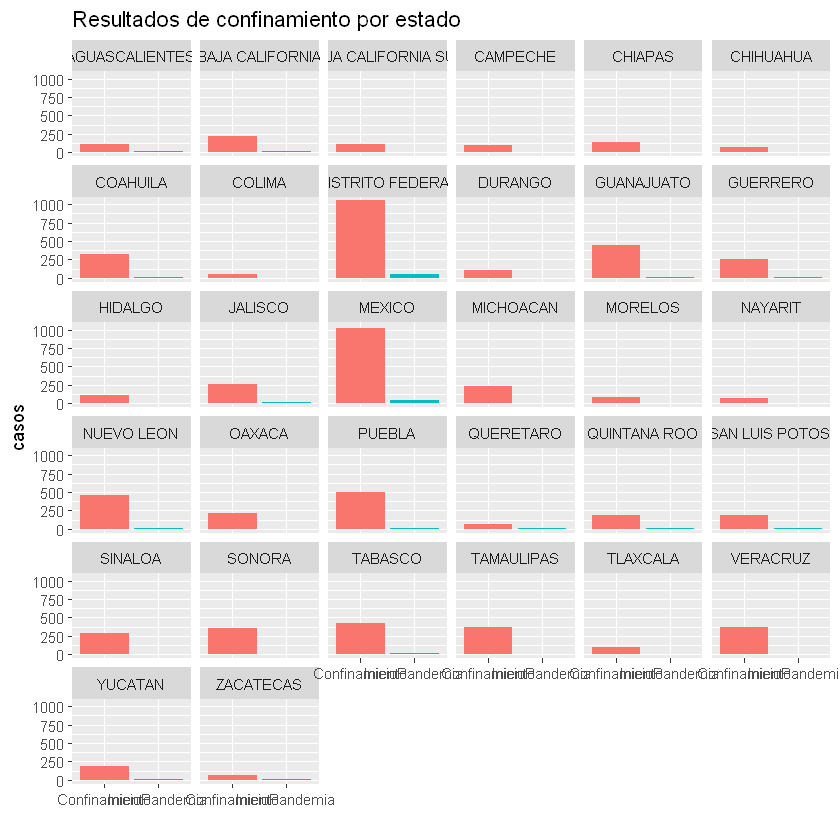

In [12]:
ggplot(df_long_estados,aes(fill=conf,y=casos,x=conf)) +
  geom_bar(position="dodge",stat="identity") +
  ggtitle("Resultados de confinamiento por estado") +
  facet_wrap(~estado)+
  theme(legend.position="none")+
  xlab("")

Los unicos estados que presentan una disminucion de casos respecto a los dos periodos son: Chihuahua, Baja California y Morelos; mientras que los 29 estados tinene aumento.

In [13]:
conf_est<-df_long_estados  %>%
  group_by(estado,conf) %>%
  summarise(casos=sum(casos,na.rm=TRUE))%>%
  spread(conf,casos)

`summarise()` regrouping output by 'estado' (override with `.groups` argument)


In [14]:
conf_est$delta<-conf_est$Confinamiento-conf_est$InicioPandemia

In [15]:
conf_est[order(conf_est$delta),]

estado,Confinamiento,InicioPandemia,delta
COLIMA,977,3,974
ZACATECAS,1506,10,1496
NAYARIT,2519,8,2511
BAJA CALIFORNIA SUR,2583,20,2563
QUERETARO,2635,32,2603
DURANGO,2915,9,2906
AGUASCALIENTES,3035,48,2987
CAMPECHE,3173,9,3164
MORELOS,3442,14,3428
TLAXCALA,3494,5,3489


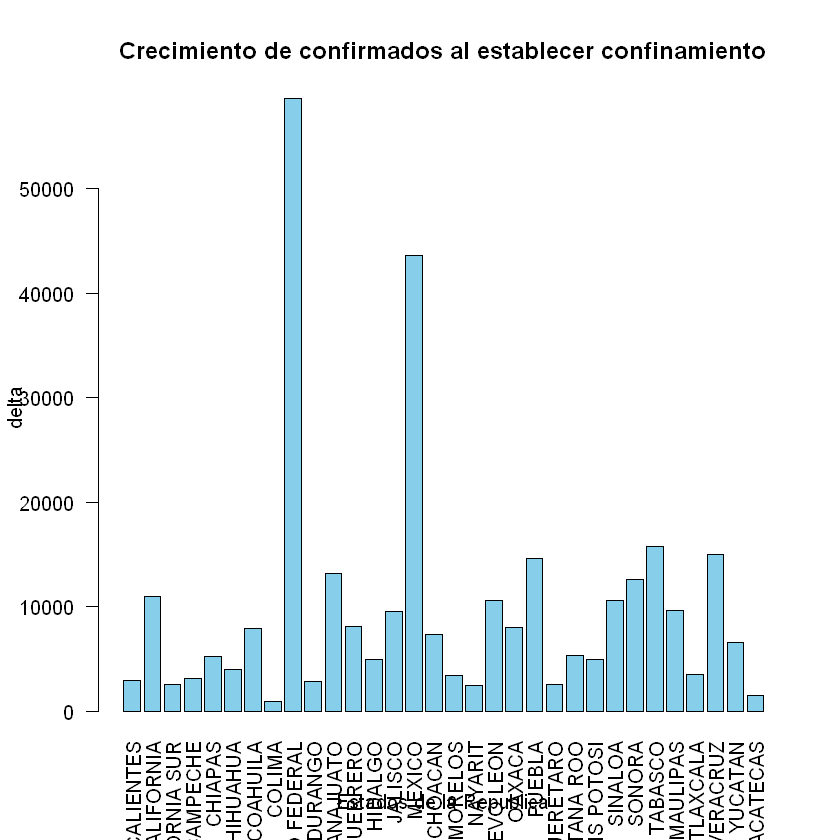

In [16]:
barplot(conf_est$delta,
        names=conf_est$estado,
        las=2,
        main='Crecimiento de confirmados al establecer confinamiento',
        xlab="Estados de la Republica",
        ylab="delta",
        col="skyblue")

In [17]:
conf_est_por<-df_long_estados  %>%
  group_by(estado) %>%
  summarise(casos=sum(casos,na.rm=TRUE),poblacion=max(poblacion))

`summarise()` ungrouping output (override with `.groups` argument)


In [18]:
conf_est_por$por<-100*conf_est_por$casos/conf_est_por$poblacion

In [19]:
plot_por<-ggplot(conf_est_por,aes(x=poblacion,y=por))+
  geom_point(size=6)

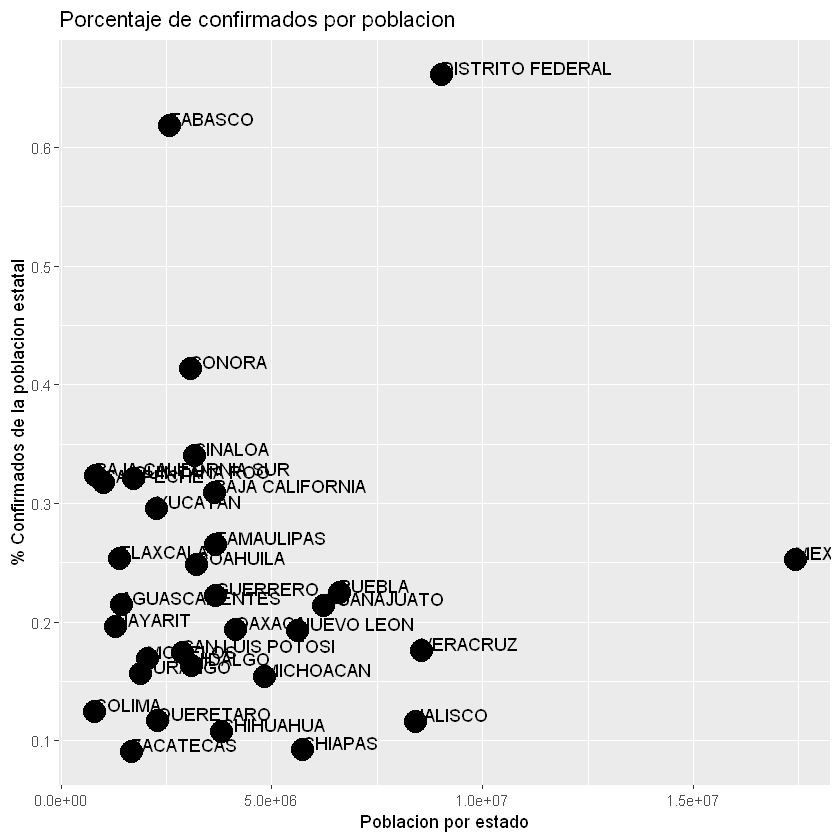

In [20]:
print(plot_por + labs( title= "Porcentaje de confirmados por poblacion", y="% Confirmados de la poblacion estatal", x = "Poblacion por estado")+geom_text(aes(label=estado),hjust=0,vjust=0))

Es importante hacer notar que al realizar los analisis en terminos relativos respecto a la poblacion total del estado, podemos notar que existen estados con porcentaje de casos confirmados alrededor entre 0.65 y 0.4% de su poblacion. Mientras que la inmensa mayoria se encuentra entre un 0.35% y 0.1%.

***Analisis de sensibilidad via regresion lineal***

In [21]:
acum_dia<-df_long_estados  %>%
  group_by(conf,fecha) %>%
  summarise(casos=sum(casos,na.rm=TRUE))

`summarise()` regrouping output by 'conf' (override with `.groups` argument)


`geom_smooth()` using formula 'y ~ x'


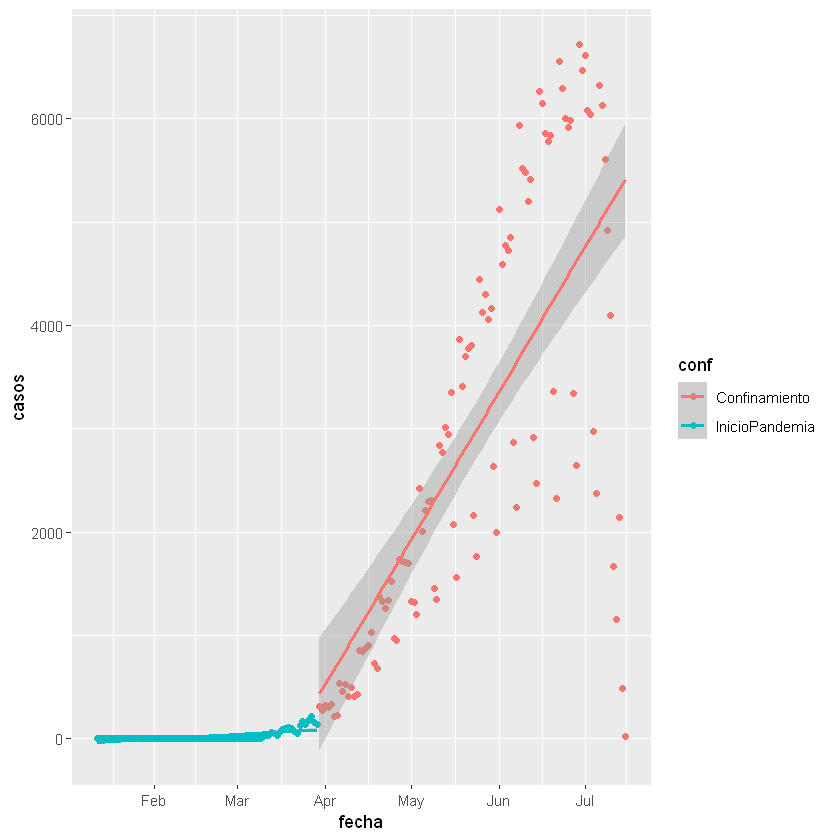

In [22]:
ggplot(acum_dia, aes(fecha,casos,group=conf,col=conf)) + 
  geom_point() + geom_smooth(method=lm)

Como lo mencionamos anteriormente, el periodo de confinamiento tienen mas casos totales que durante el inicio de la pandemia. No obstante, mediante el analisis de regresion simple se muestra que la pendiente de los dos modelos es diferente. Mientras que para la primera fase es positiva, para el segundo momento es menor y negativa. Lo que podria indicarnos que existe un cambio en la tendencia de confirmados por Covid-19. Es muy importante seguir monitoreando este desempeño para verificar que este comportamiento sea sostenido en el tiempo.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


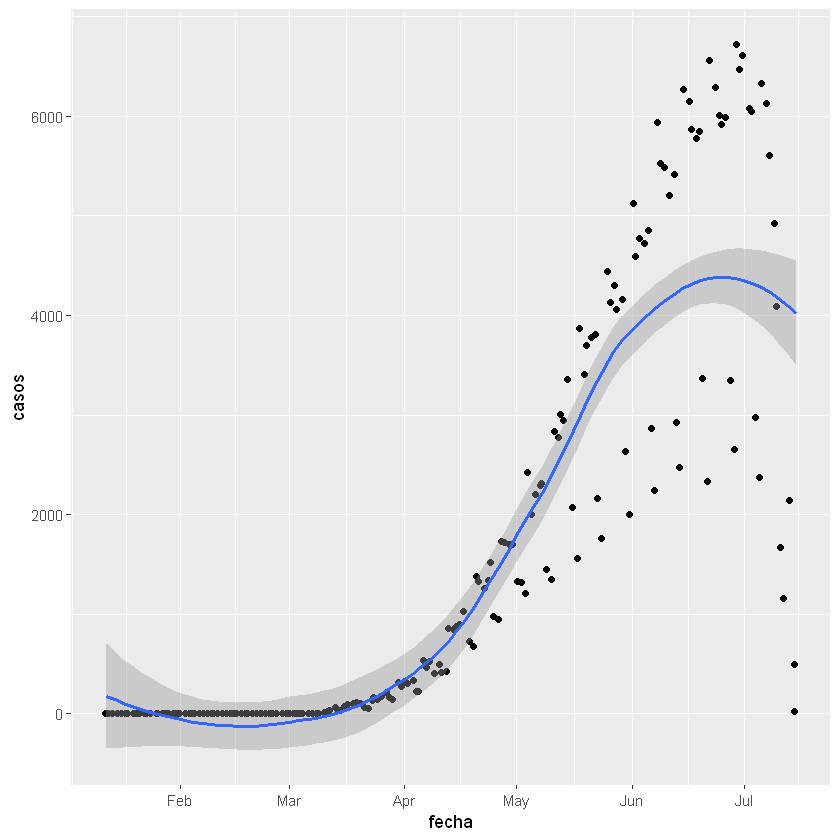

In [28]:
ggplot(acum_dia, aes(fecha,casos)) + 
  geom_point() + geom_smooth()

### Regreso escalonado de actividades

Queremos conocer el efecto que tiene la reactivación de actividades en la cantidad de contagios. Al regresar a las actividades podríamos observar un crecimiento de contagios. Para este análisis solo vamos a seleccionar los estados que cambiaron a semáforo naranja a partir del 29 de junio de 2020.

In [237]:
df_AGS<-df_long %>% filter(estado=="AGUASCALIENTES")
df_BCS<-df_long %>% filter(estado=="BAJA CALIFORNIA SUR")
df_CAM<-df_long %>% filter(estado=="CAMPECHE")
df_CHP<-df_long %>% filter(estado=="CHIAPAS")
df_CHI<-df_long %>% filter(estado=="CHIHUAHUA")
df_DF<-df_long %>% filter(estado=="DISTRITO FEDERAL")
df_COA<-df_long %>% filter(estado=="COAHUILA")
df_DUR<-df_long %>% filter(estado=="DURANGO")
df_GTO<-df_long %>% filter(estado=="GUANAJUATO")
df_JAL<-df_long %>% filter(estado=="JALISCO")
df_MCH<-df_long %>% filter(estado=="MICHOACAN")
df_QRO<-df_long %>% filter(estado=="QUERETARO")
df_QTN<-df_long %>% filter(estado=="QUINTANA ROO")
df_SLP<-df_long %>% filter(estado=="SAN LUIS POTOSI")
df_TAM<-df_long %>% filter(estado=="TAMAULIPAS")
df_VER<-df_long %>% filter(estado=="VERACRUZ")
df_YUC<-df_long %>% filter(estado=="YUCATAN")
df_ZAC<-df_long %>% filter(estado=="ZACATECAS")

In [238]:
df_long_sem<-bind_rows(df_AGS, df_BCS, df_CAM, df_CHP, df_CHI, df_DF, df_COA, df_DUR, df_GTO, df_JAL, df_MCH, df_QRO, df_QTN, df_SLP, df_TAM, df_VER, df_YUC, df_ZAC)

In [239]:
str(df_long_sem)

tibble [3,258 x 5] (S3: tbl_df/tbl/data.frame)
 $ cve_ent  : int [1:3258] 1 1 1 1 1 1 1 1 1 1 ...
 $ poblacion: int [1:3258] 1434635 1434635 1434635 1434635 1434635 1434635 1434635 1434635 1434635 1434635 ...
 $ estado   : Factor w/ 33 levels "AGUASCALIENTES",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ fecha    : Date[1:3258], format: "2020-01-12" "2020-01-13" ...
 $ casos    : int [1:3258] 0 0 0 0 0 0 0 0 0 0 ...


In [240]:
df_long_sem<-df_long_sem %>% 
                            mutate(semaforo=ifelse(fecha>=ymd(20200629), "naranja", "rojo"))

A continuación graficaremos por estado la cantidad de casos confirmados, pero haremos un corte el día 29 de junio, que es cuando estos estados entraron en semáforo naranja, lo cual implica que se quitó la restricción a ciertas actividades. De acuerdo con el gobierno federal, el semáforo naranja implica que "además de las actividades económicas esenciales, se permitirá que las empresas de las actividades económicas no esenciales trabajen con el 30% del personal para su funcionamiento, siempre tomando en cuenta las medidas de cuidado máximo para las personas con mayor riesgo de presentar un cuadro grave de COVID-19, se abrirán los espacios públicos abiertos con un aforo (cantidad de personas) reducido."

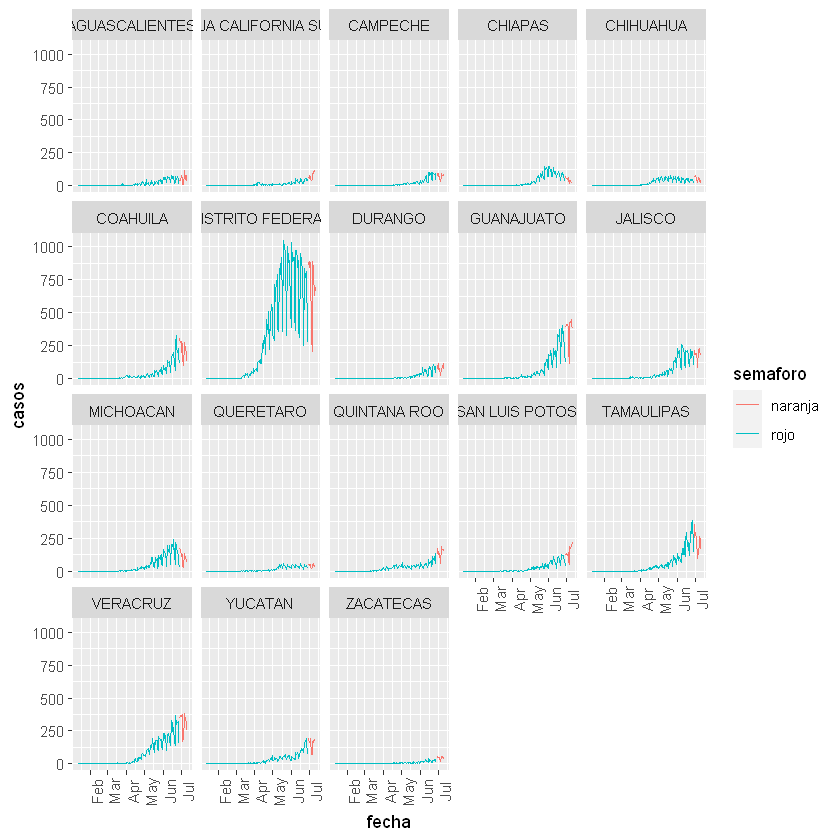

In [277]:
ggplot(data=df_long_sem, aes(x= fecha, y=casos, color=semaforo)) +
    geom_line() +
    theme(axis.text.x = element_text(angle = 90))+
    facet_wrap(~estado)

A continuación realizamos una aproximación a los datos por medio de una regresión local (loess) que hace ggplot2. Hay pocos datos a partir de la fecha corte y tienen mucha variación. Por lo que esta aproximación no parece ser muy adecuada, para los datos previos al corte esta aproximación logra una proximación sin "picos", pero para los datos después del corte, la aproximación tiene mucha variación.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


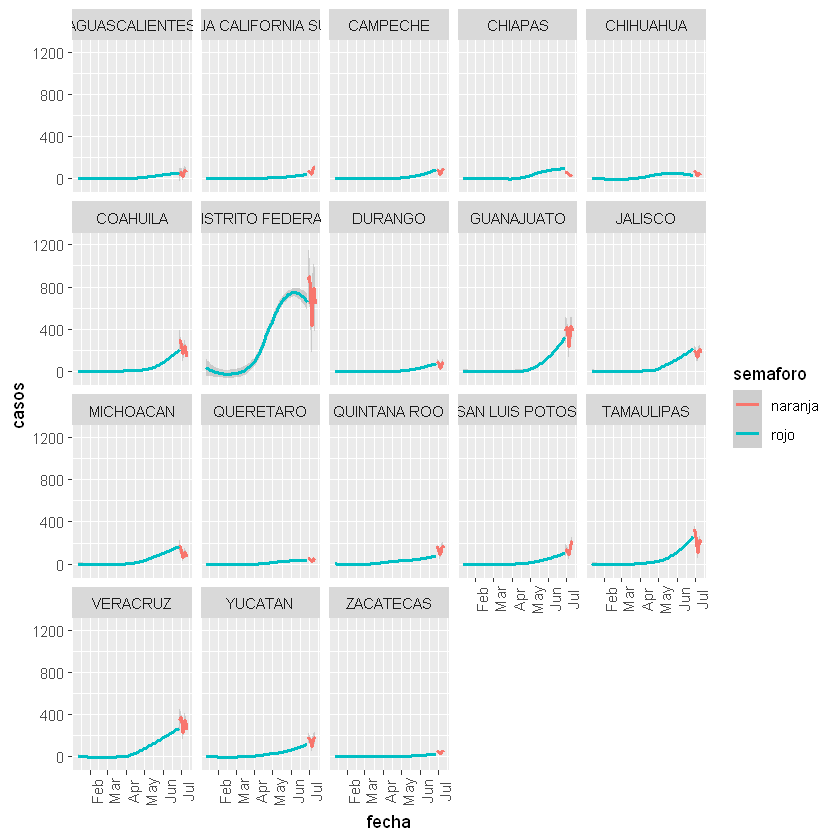

In [275]:
ggplot(data=df_long_sem, aes(x= fecha, y=casos, color=semaforo)) +
    geom_smooth() +
    theme(axis.text.x = element_text(angle = 90))+
    facet_wrap(~estado)

Para intentar eliminar las fluctuaciones vistas en las gráficas anteriores, realizamos una regresión local (loess), pero al logaritmo de los casos reportados por estado. Pero como se peude ver a continuación, la aproximación para los datos posteriores al corte aún tienen muchas variaciones.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 1215 rows containing non-finite values (stat_smooth)."

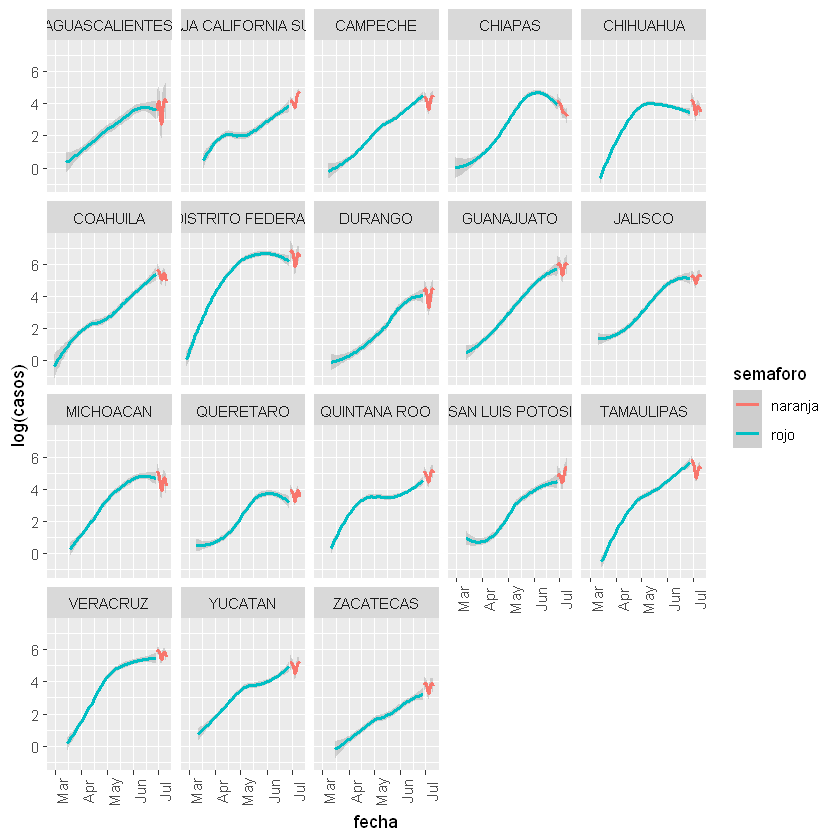

In [276]:
ggplot(data=df_long_sem, aes(x= fecha, y=log(casos), color=semaforo)) +
    geom_smooth() +
    theme(axis.text.x = element_text(angle = 90))+
    facet_wrap(~estado)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 1215 rows containing non-finite values (stat_smooth)."

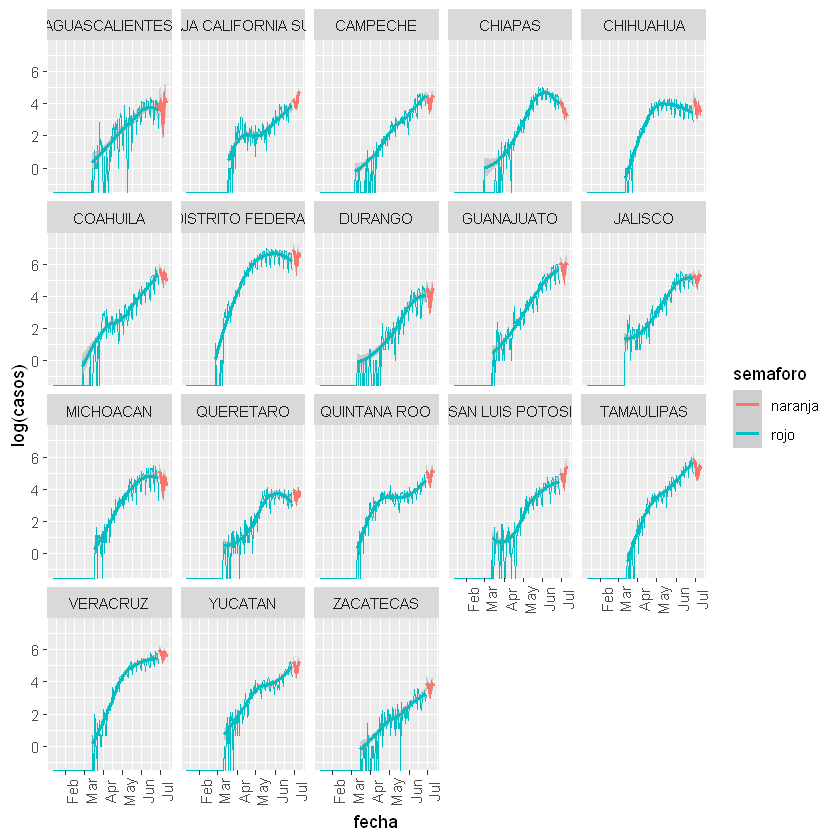

In [287]:
ggplot(data=df_long_sem, aes(x= fecha, y=log(casos), color=semaforo)) +
    geom_line() +
    geom_smooth() +
    theme(axis.text.x = element_text(angle = 90))+
    facet_wrap(~estado)

Para evitar los problemas anteriormente mencionados, cambiamos el método de aproximación a una forma lineal. De esta forma podemos eliminar las fluctuaciones vistas especialmente en los casos después del corte.

`geom_smooth()` using formula 'y ~ x'


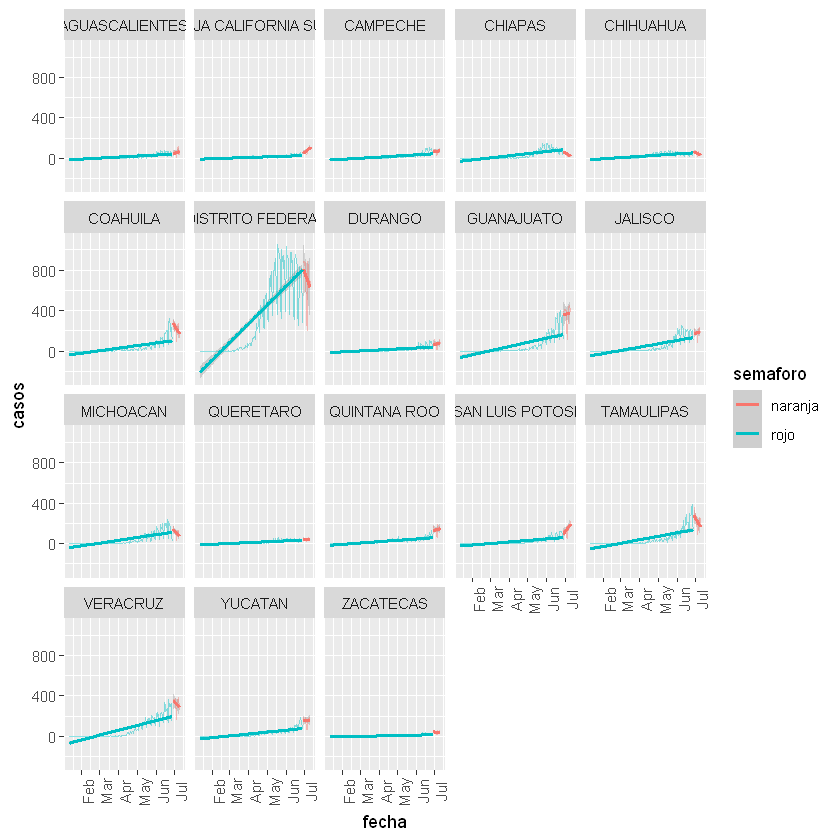

In [288]:
ggplot(data=df_long_sem, aes(x= fecha, y=casos, color=semaforo)) +
    geom_smooth(method=lm) +
    geom_line(alpha=.45)+
    theme(axis.text.x = element_text(angle = 90))+
    facet_wrap(~estado)

`geom_smooth()` using formula 'y ~ x'
Warning message:
"Removed 1215 rows containing non-finite values (stat_smooth)."

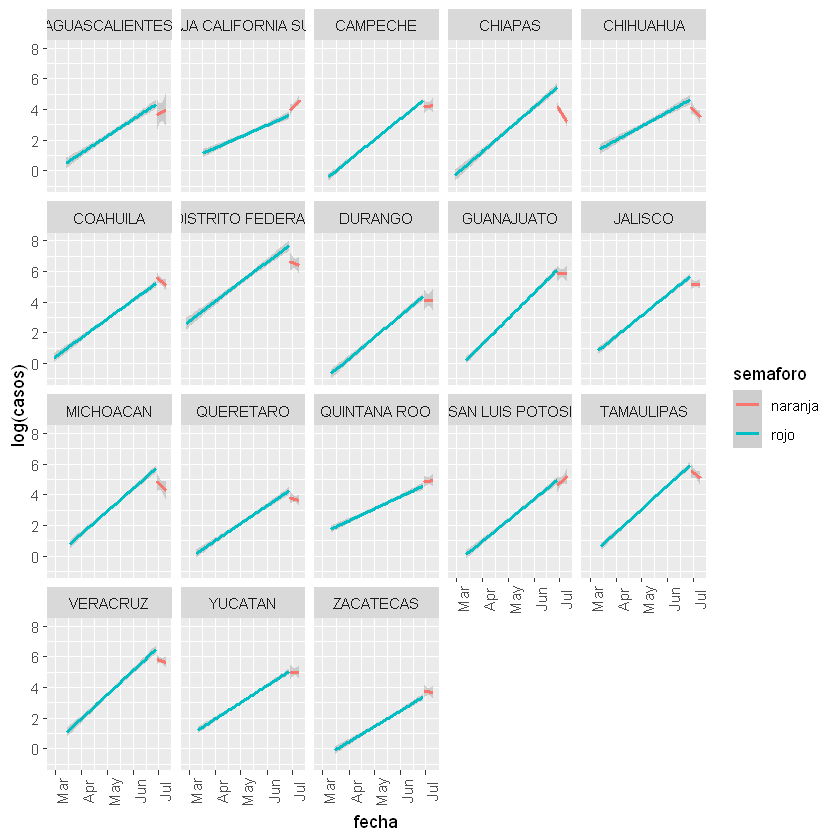

In [289]:
ggplot(data=df_long_sem, aes(x= fecha, y=log(casos), color=semaforo)) +
    geom_smooth(method=lm) +
    theme(axis.text.x = element_text(angle = 90))+
    facet_wrap(~estado)

Podemos observar de las gráficas que para los estados de Coahuila, Ciudad de México, Michoacán, Querétaro, Tamaulipas y Veracruz parece que la cantidad de casos va en decrecimiento. Yucatán y Zacatecas parece que están llegando al caso máximo de contagios y que podría emepzar a disminuir. Aguascalientes, Baja California Sur, Campeche, Quintana Roo y San Luis Potosí siguen en aumente de casos confirmados. Pero estos resultados serían muy preeliminares debido a que apenas son 11 observaciones las que estaríamos considerando, del 29 de junio al 10 de julio. Por lo tanto, estos resultados no serían conluyentes.

### Caso Ciudad de México

Para ver ver a mayor detalle, mostraremos las mismas gráficas que realizamos anteriormente, pero únicamente para la Ciudad de México.

`geom_smooth()` using formula 'y ~ x'


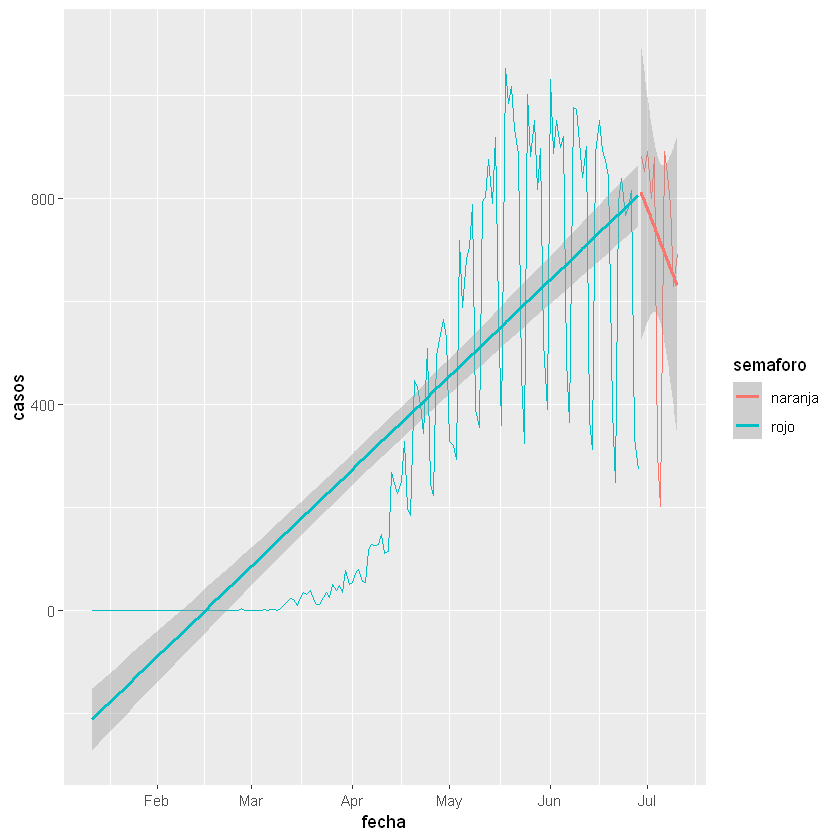

In [254]:
ggplot(subset(df_long_sem, estado=='DISTRITO FEDERAL'), aes(x= fecha, y=casos, color=semaforo)) +
    geom_line() + 
    geom_smooth(method=lm)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


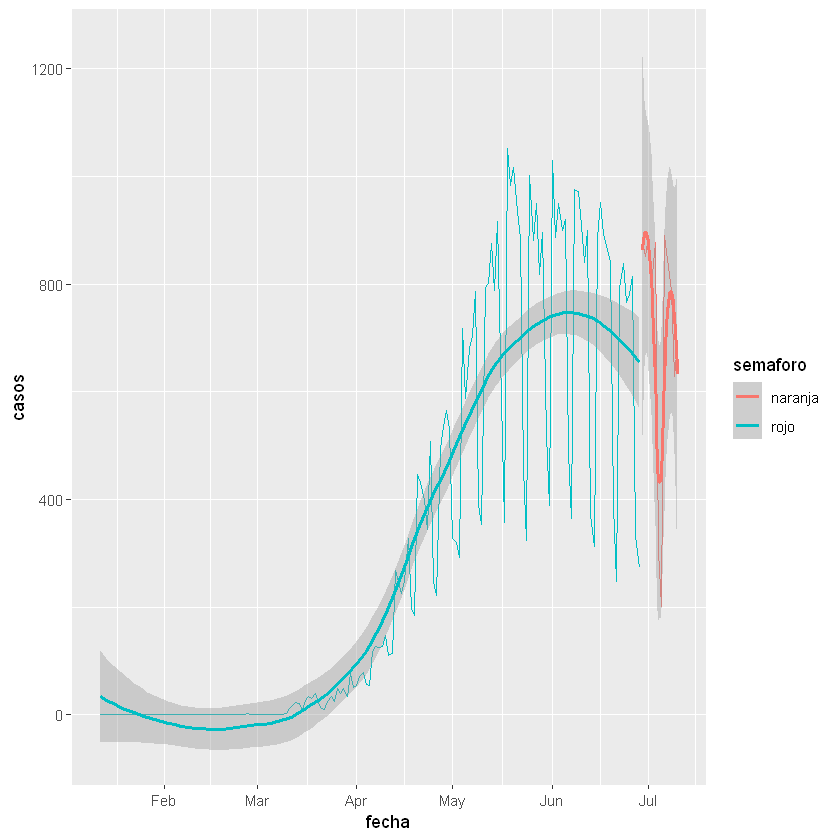

In [255]:
ggplot(subset(df_long_sem, estado=='DISTRITO FEDERAL'), aes(x= fecha, y=casos, color=semaforo)) +
    geom_line() + 
    geom_smooth()

`geom_smooth()` using formula 'y ~ x'


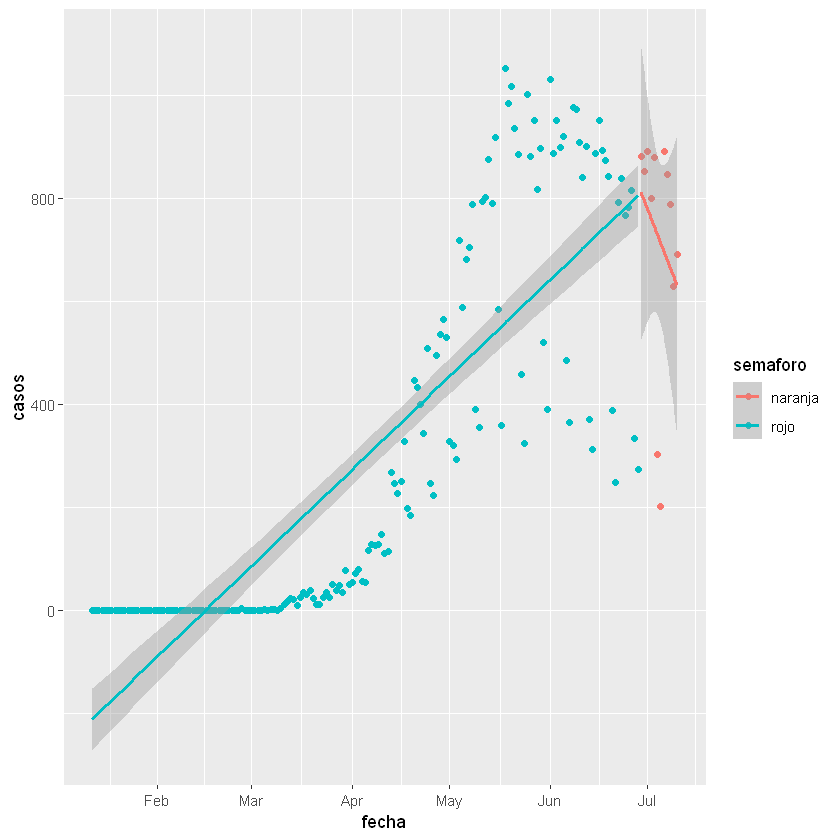

In [285]:
ggplot(subset(df_long_sem, estado=='DISTRITO FEDERAL'), aes(x= fecha, y=casos, color=semaforo)) +
    geom_point() + 
    geom_smooth(method=lm)

`geom_smooth()` using formula 'y ~ x'
Warning message:
"Removed 54 rows containing non-finite values (stat_smooth)."

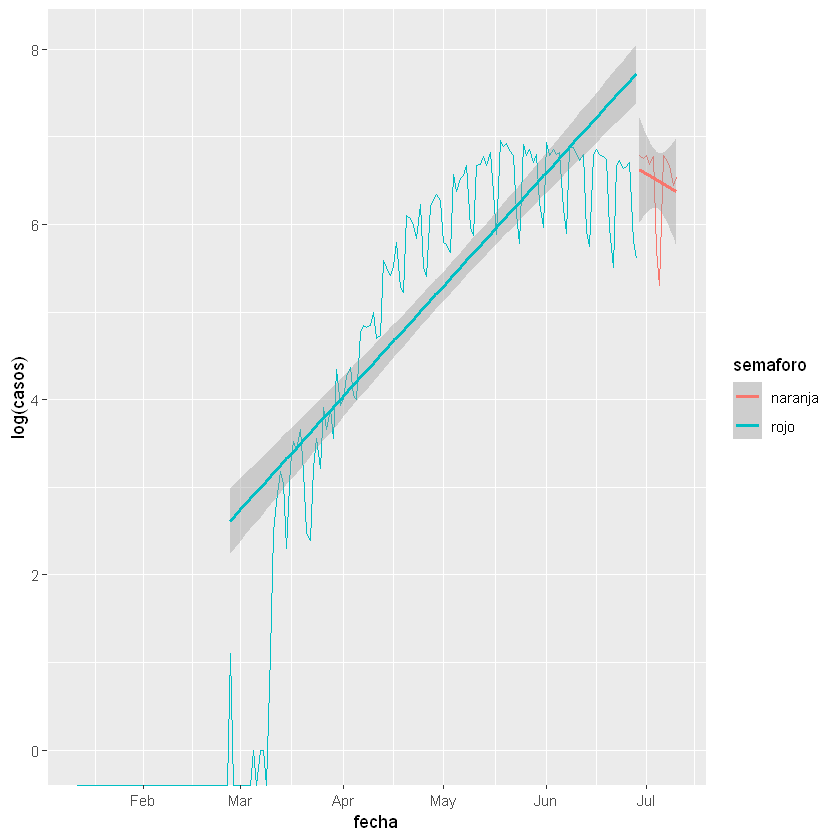

In [286]:
ggplot(subset(df_long_sem, estado=='DISTRITO FEDERAL'), aes(x= fecha, y=log(casos), color=semaforo)) +
    geom_line() + 
    geom_smooth(method=lm)

## Conclusiones

**Informacion Estatal**

Lo que podemos observar en los estados es un aumento de casos confirmados conforme aumenta el tiempo de la pandemia.

Es muy importante considerar los casos confirmados respecto a la totalidad de la poblacion del estado, es decir, el porcentaje de su poblacion contagiada. De hecho, notamos que existen estados con porcentajes entre 0.7 y 0.4% de su poblacion, mientras que la inmensa mayoria se encuentra en un rango de 0.1% y 0.35%.

**Analisis de sensibilidad via regresion lineal**

El periodo de confinamiento tienen mas casos totales que durante el inicio de la pandemia. No obstante, mediante el analisis de regresion simple se muestra que la pendiente de las tres fases es diferente; para la segunda fase (Confinamiento) es positiva y para la tercera fase (Semáforo) es negativa. Lo que podria indicarnos que existe un cambio en la tendencia de confirmados por Covid-19. Es muy importante seguir monitoreando este desempeño para verificar que este comportamiento sea sostenido en el tiempo.

**Reactivación de actividades escalonada**

La reactivacion de actividades no ha ocasiado un crecimiento de los contagiados para la mayoría de los estados seleccionados. Los estados de Coahuila, Ciudad de México, Michoacán, Querétaro, Tamaulipas y Veracruz parece que la cantidad de casos va en decrecimiento. Yucatán y Zacatecas parece que están llegando al caso máximo de contagios y que podría emepzar a disminuir. Aguascalientes, Baja California Sur, Campeche, Quintana Roo y San Luis Potosí siguen en aumento de casos confirmados. Pero estos **resultados serían muy preeliminares** debido a que apenas son 11 observaciones las que estamos considerando, del 29 de junio al 10 de julio. Por lo tanto, estos resultados no serían conluyentes. Será de gran importancia el monitoreo continuo de estos estados para poder contener y sobre todo controlar los brotes de la pandemia.

Para el caso particular de la CDMX, podemos notar mediante el uso de una regresion simple que la tasa de crecimiento de casos confirmados no es la misma en el semaforo rojo y naranja. Para el primero es positiva mientras que para el segundo negativa. Al ser un periodo con mucho cambio en el comportamiento social, se sugiere realizar estos analisis con frecuencia para evitar comportamientos adversos de la pandemia.